### Central Limit Theorem
The Central Limit Theorem states that if $n$ independently and identically distributed random variables are sampled, as $n \to \infty$, the distribution of the sample mean of the random variables is normally distributed.

**Inspired by:** [But what is the Central Limit Theorem? - 3Blue1Brown](https://youtu.be/zeJD6dqJ5lo])

In [1]:
import matplotlib.pyplot as plt
import random
import math
import scipy
import collections

DICE_MIN = 1
DICE_MAX = 6
DICE_PROB = 1/6

We start by defining some functions about the dice.

In [2]:
# A function that returns a dice number with unweighted odds
def dice():
    return math.floor( random.uniform(0,5) ) + 1

# A dice distribution function
def diceDistribution(x):
    if x >= DICE_MIN and x <= DICE_MAX: return DICE_PROB
    return 0

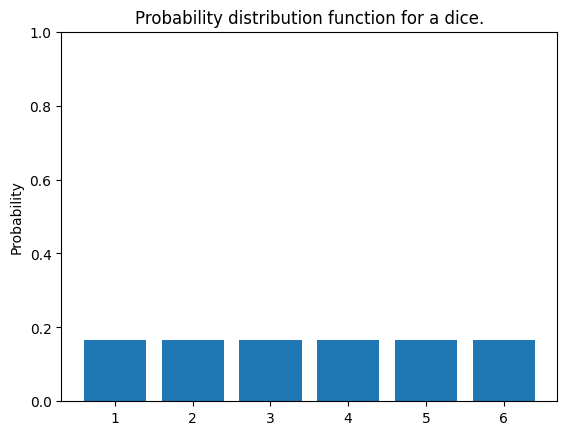

In [3]:
x = [i for i in range(DICE_MIN, DICE_MAX+1)]
y = [diceDistribution(i) for i in range(DICE_MIN, DICE_MAX+1)]

ax = plt.gca()
ax.bar(x, y)
ax.set_ylabel("Probability")
ax.set_title("Probability distribution function for a dice.")
ax.set_ylim([0,1])
plt.show()

We will run a sample of **100,000** to ensure that the `uniform` function truly generates values following a uniform distributions

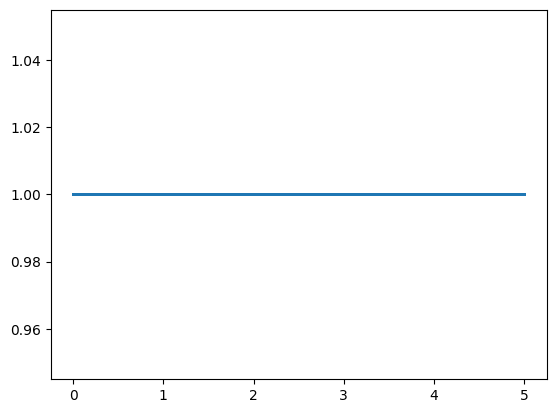

In [4]:
sample = 100000
x = [random.uniform(0,5) for _ in range(sample)]
y = [1 for _ in range(sample)]

ax = plt.gca()
ax.scatter(x, y, s=.2)
plt.show()

In [5]:
def convolveInputs(val1, val2):
    val2 = val2[::-1]
    start = -len(val2)
    end = 0
    res = set()
    while start < len(val1):
        start_overlap = max(0, start)
        end_overlap = min(end, len(val1))
        if end < len(val1):
            res.add(val1[end_overlap] + val2[-1])
        elif start > 0:
            res.add(val1[start_overlap] + val2[0])
            
        start += 1
        end += 1
    
    return list(res)

We now take the convolution of two of these distributions

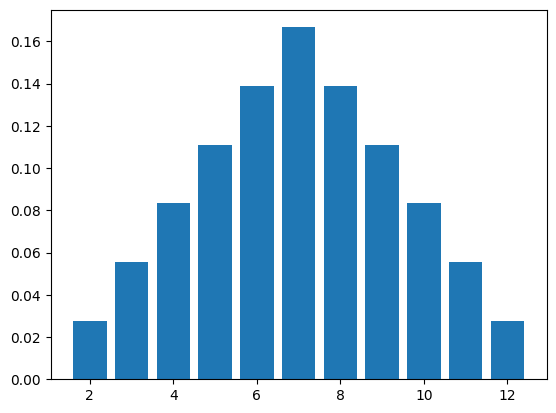

In [6]:
x1 = [diceDistribution(i) for i in range(1, 7)]
x2 = [diceDistribution(i) for i in range(1, 7)]
x3 = scipy.signal.convolve(x1, x2)
x3_values = convolveInputs([_ for _ in range(1, 7)], [_ for _ in range(1, 7)])

ax = plt.gca()
ax.bar(x3_values, x3)
plt.show()

We can now repeat the process for 10 random variables.

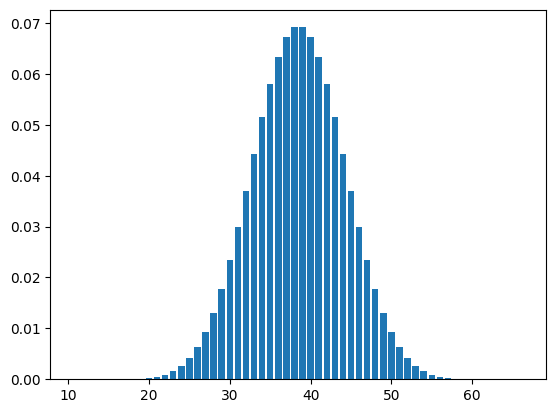

In [7]:
x = [1/6 for i in range(1, 7)]
x_vals = [i for i in range(1, 7)]

for _ in range(10):
    x2 = [1/6 for i in range(1, 7)]
    x2_vals = [i for i in range(1, 7)]
    x3 = scipy.signal.convolve(x, x2)
    x3_vals = convolveInputs(x_vals, x2_vals)
    x = x3
    x_vals = x3_vals

ax = plt.gca()
ax.bar(x_vals, x)
plt.show()

We can show that it does not matter what distribution we start with. 

Let's define a completely random but weighted die. 

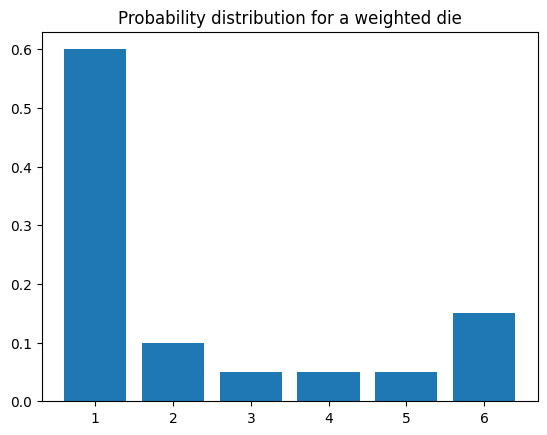

In [8]:
# Weighted die
x = [1,2,3,4,5,6]
y = [.6, .1, .05, .05, .05, .15 ]

ax = plt.gca()
ax.bar(x, y)
ax.set_title("Probability distribution for a weighted die")
plt.show()

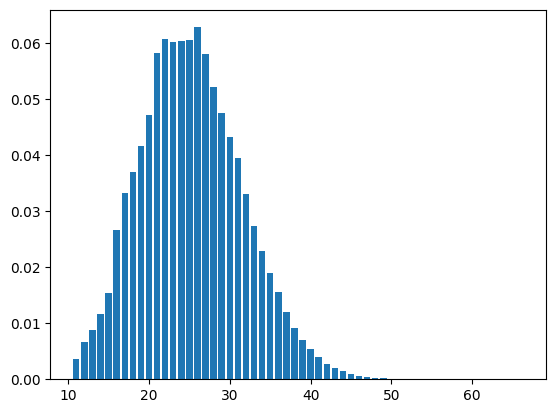

In [9]:
x = [.6, .1, .05, .05, .05, .15 ]
x_vals = [1,2,3,4,5,6]

for _ in range(10):
    x2 = [.6, .1, .05, .05, .05, .15]
    x2_vals = [1,2,3,4,5,6 ]
    x3 = scipy.signal.convolve(x, x2)
    x3_vals = convolveInputs(x_vals, x2_vals)
    x = x3
    x_vals = x3_vals

ax = plt.gca()
ax.bar(x_vals, x)
plt.show()

We can see that the graph **somewhat** represents a bell curve 

Let's repeat this process for 50 random variables.

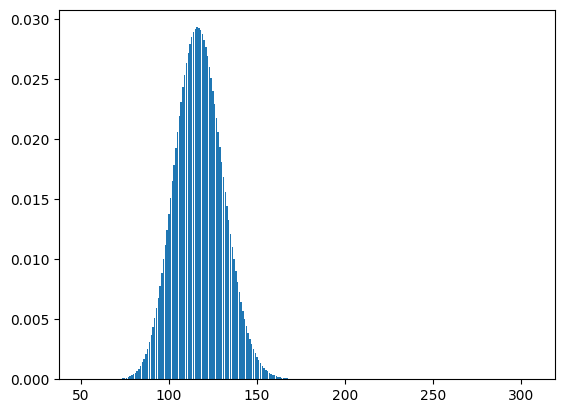

In [10]:
x = [.6, .1, .05, .05, .05, .15 ]
x_vals = [1,2,3,4,5,6]

for _ in range(50):
    x2 = [.6, .1, .05, .05, .05, .15]
    x2_vals = [1,2,3,4,5,6 ]
    x3 = scipy.signal.convolve(x, x2)
    x3_vals = convolveInputs(x_vals, x2_vals)
    x = x3
    x_vals = x3_vals

ax = plt.gca()
ax.bar(x_vals, x)
plt.show()

We can see that this is more like a bell curve.
We can subtract the mean, and rescale it by its standard deviation to get a better view of it.

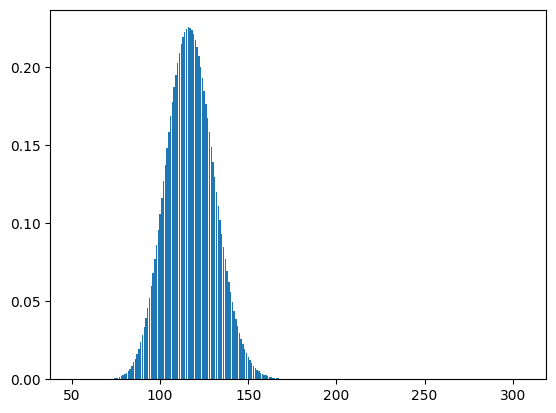

In [14]:
N = len(x)
mean = sum(x)/N
std = 0
for i in x:
    std += (i-mean)**2
std = (std) ** (1/2)

# Rescale
rescaled_x = [i/std for i in x]
rescaled_x_vals = [(i-mean) for i in x_vals]

ax = plt.gca()
ax.bar(rescaled_x_vals, rescaled_x)
plt.show()